In [0]:
pip install scikit-tda

     |████████████████████████████████| 81kB 4.5MB/s 
     |████████████████████████████████| 102kB 12.4MB/s 
  Created wheel for ripser: filename=ripser-0.4.1-cp36-cp36m-linux_x86_64.whl size=423360 sha256=8a61f1885bbeb60136371715085464065c7c2ba8d0f2e689995ef55608de5e70
  Stored in directory: /root/.cache/pip/wheels/d4/12/da/56d55c3af62ebd5e0684d521f3e58c1a85ac312502c9e2d47d
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18091 sha256=ca1b7a00a0ca2377d331362658f73b748bf01ee16947332b61f194433d8137d9
  Stored in directory: /root/.cache/pip/wheels/2b/e1/c9/1993c7f7f114b7d3fb2d3e895e02157a7ebf554861e9e54e01
Successfully built ripser hopcroftkarp


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from numpy import genfromtxt
from ripser import ripser,lower_star_img
from persim import plot_diagrams

In [0]:
from google.colab import files
uploaded= files.upload()

Saving letters.csv to letters.csv


In [0]:
letters = genfromtxt('letters.csv', delimiter =',')
#the main block: run 6 scans for each of the 26 letters, store results in a dictionary.
i=0
i_to_result = dict()
while i<=25:
    letter_one_line = letters[i,:]
#initialize matrix of size 10x10 with all values 100
    letter= np.full((10,10),100)
   #test 1 probing upper left
    for k in range(1,100):
        if letter_one_line[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= max((k-1)%10, int((k-1)/10))
    PUscan = lower_star_img(letter)
    #test 2 left to right
    for j in range(1,100):
        if letter_one_line[j]==1.0:
            row=int((j-1)/10)
            column= (j-1)%10
            letter[row,column]= j%10
    LRscan = lower_star_img(letter)
    #test 3 right to left
    for k in range(1,100):
        if letter_one_line[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= 10 - (k-1)%10
    RLscan = lower_star_img(letter)
    #test 4 probing from bottom right
    for k in range(1,100):
        if letter_one_line[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= max(9-(k-1)%10,9-int((k-1)/10))  
    PLBscan = lower_star_img(letter)
    #test 5 probing from upper right to lower left 
    for k in range(1,100):       
        if letter_one_line[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= max(9-(k-1)%10,int((k-1)/10))  
    PURscan = lower_star_img(letter) 
    #test 6
    letter_ones_line = letters[i,1:]
    newletter = letter_ones_line.reshape(10,10)
    coordinates = np.argwhere(newletter == 1)
    dgms = ripser(coordinates)['dgms']
    h1_test = dgms[1]
    
    i_to_result[i] = (PUscan, LRscan, RLscan, PLBscan, PURscan, h1_test)
    i+=1

#change all infinity in life-death pair to 100.    
l=0
while l <=25:
    for j in range(6):
        len_j = len(i_to_result[l][j])
        for k in range(len_j):
            if str(i_to_result[l][j][k][1])=='inf':
                i_to_result[l][j][k][1]=100
    l+=1
#calculate feature vector for each letter, store them in a matrix. 
#every feature vector has 5 components, each component stands for the sum of "lifespan" of the life-death pairs in one scan.
l=0
vec_mtx = np.zeros((26,6))
while l < 26:
    for j in range(6):
        len_j = len(i_to_result[l][j])
        sum_j = 0
        for k in range(len_j):
            sum_j = sum_j+ (i_to_result[l][j][k][1]-i_to_result[l][j][k][0])
            vec_mtx[l][j] = sum_j
    l+=1
print('feature matrix:\n',vec_mtx,'\n')

#calculate the pairwise distance between each two letter, store them in a list.
all_dis = []
for q in range(26):
    for p in range(q):
            dis = np.linalg.norm(vec_mtx[q]-vec_mtx[p])
            all_dis.append((dis,p,q))

#sort all the distance from low to high, find the minimum distance, also find which letter pair has the minimum distance.             
def getkey(item):
    return item[0]

sorted_dis = sorted(all_dis, key=getkey)
print('how many items in this sorted distance list:',len(sorted_dis),'\n','sorted distance:',sorted_dis,'\n')

print('min distance is between',sorted_dis[0][1],'th letter and',sorted_dis[0][2],'th letter. min distance is',sorted_dis[0][0],'\n')

feature matrix:
 [[ 97.          98.          97.          98.          97.
    3.48528123]
 [ 98.          97.          98.          98.          97.
    6.23334539]
 [ 98.          98.         102.          98.          99.
    0.82842708]
 [ 98.          97.          98.          98.          98.
    5.24264061]
 [ 98.          97.         107.         100.         101.
    0.73304415]
 [ 98.          97.         100.          95.         100.
    0.3245554 ]
 [ 98.          98.         100.          97.          99.
    2.42366862]
 [ 98.          97.          96.          97.          97.
    0.12310553]
 [ 97.          97.          96.          96.          96.
    0.        ]
 [ 97.          98.          95.          96.          96.
    0.        ]
 [ 98.          97.          99.          97.          98.
    0.82842708]
 [ 98.          97.          96.          97.          93.
    0.        ]
 [ 99.          98.          97.         100.          98.
    2.12899017]
 [ 99.  

In [0]:
Letters= pd.read_csv("letters.csv")
Letters[9:10]

,1,0,0.1,0.2,0.3,1.1,1.2,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,1.3,1.4,0.12,0.13,0.14,0.15,0.16,0.17,0.18,1.5,1.6,1.7,0.19,0.20,0.21,0.22,0.23,0.24,0.25,1.8,1.9,1.10,1.11,0.26,0.27,...,0.41,0.42,1.20,0.43,0.44,0.45,1.21,0.46,0.47,0.48,0.49,1.22,1.23,0.50,0.51,0.52,1.24,1.25,0.53,0.54,0.55,1.26,0.56,0.57,0.58,0.59,0.60,1.27,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72
9,11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,...,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


[11  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  1  0  0  0  0  0  0  1
  0  0  0  1  0  0  0  0  0  1  0  1  1  1  0  0  0  0  0  1  0  1  1  0
  0  0  0  0  0  1  1  1  0  0  0  0  0  0  0  1  1  1  1  0  0  0  0  0
  0  1  0  0  1  1  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0]
feature vect of input list is: [101.          99.          98.          97.          97.
   1.95084465]
the best fitted letter is: 21 th letter 
 the closest distance is: 2.7131596267111178 



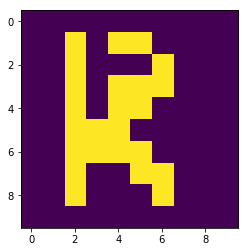

In [0]:
#convert new test input list of 01010101... into feature vector.
def get_feature_vec(test): # 'test' stands for the 01010101... input.
    #run all the scans, get the life-death pairs.
    letter= np.full((10,10),100)
   #test 1 probing upper left
    for k in range(1,100):
        if test[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= max((k-1)%10, int((k-1)/10))
    PUscan = lower_star_img(letter)
    #test 2 left to right
    for j in range(1,100):
        if test[j]==1.0:
            row=int((j-1)/10)
            column= (j-1)%10
            letter[row,column]= j%10
    LRscan = lower_star_img(letter)
    #test 3 right to left
    for k in range(1,100):
        if test[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= 10 - (k-1)%10
    RLscan = lower_star_img(letter)
    #test 4 probing from bottom right
    for k in range(1,100):
        if test[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= max(9-(k-1)%10,9-int((k-1)/10))  
    PLBscan = lower_star_img(letter)
    #test 5 probing from upper right to lower left 
    for k in range(1,100):       
        if test[k]==1.0:
            row=int((k-1)/10)
            column= (k-1)%10
            letter[row,column]= max(9-(k-1)%10,int((k-1)/10))  
    PURscan = lower_star_img(letter) 
    #test 6
    newletter = test[1:].reshape(10,10)
    coordinates = np.argwhere(newletter == 1)
    dgms = ripser(coordinates)['dgms']
    h1_test = dgms[1]
    test_result = (PUscan, LRscan, RLscan, PLBscan, PURscan, h1_test)
    #change all infini to 100
    for j in range(6):
        len_j = len(test_result[j])
        for k in range(len_j):
            if str(test_result[j][k][1])=='inf':
                test_result[j][k][1]=100
    #get the feature vector
    test_feature = np.zeros(6)
    for j in range(6):
        len_j = len(test_result[j])
        sum_j = 0
        for k in range(len_j):
            sum_j = sum_j+ (test_result[j][k][1]-test_result[j][k][0])
            test_feature[j] = sum_j
            
    return test_feature

#make up a test list. I wrote the letter S (the 18th letter) in 10X10 grid, and recored the coordinates in one_list.
#New_C = letters[4]
#New_C = [11,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
New_C = [11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
#New_C = [9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#New_C = [9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
New_C = np.asarray(New_C)
plt.imshow(New_C[1:].reshape(10,10))
print(New_C)
feature_vect = get_feature_vec(New_C)


print('feature vect of input list is:',feature_vect)
#print('standard feature vect of c is:', vec_mtx[3])

#compare the newly obtained test feature vector, to each of the feature vector stored in matrix.
test_dis = []
for i in range(len(vec_mtx)):
    # compare feature_vect with each of the vect in vec_mtx, see which distance=norm(feature_vect - vect) is smalletst.
    d = np.linalg.norm(feature_vect - vec_mtx[i])
    test_dis.append((d,i))
    
#then find the which vector has the smallest distance with input test vector, choose it as our best fitted letter.
sorted_result = sorted(test_dis,key=getkey)
print('the best fitted letter is:',sorted_result[0][1],'th letter','\n','the closest distance is:',sorted_result[0][0],'\n')
     #'other option:',sorted_result[1],sorted_result[2],sorted_result[3],'\n')

#print('full resulting distance:','\n',sorted_result)

array([ 98.        ,  97.        , 107.        , 100.        ,
       101.        ,   0.73304415])

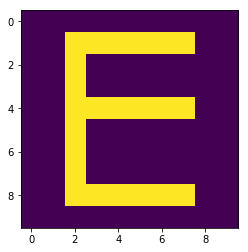

In [0]:
k = letters[4]
plt.imshow(k[1:].reshape(10,10))
vec_mtx[4]